# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:27:45.520169: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:27:48.355650
2025-04-14 20:27:48.355650


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:27:43"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

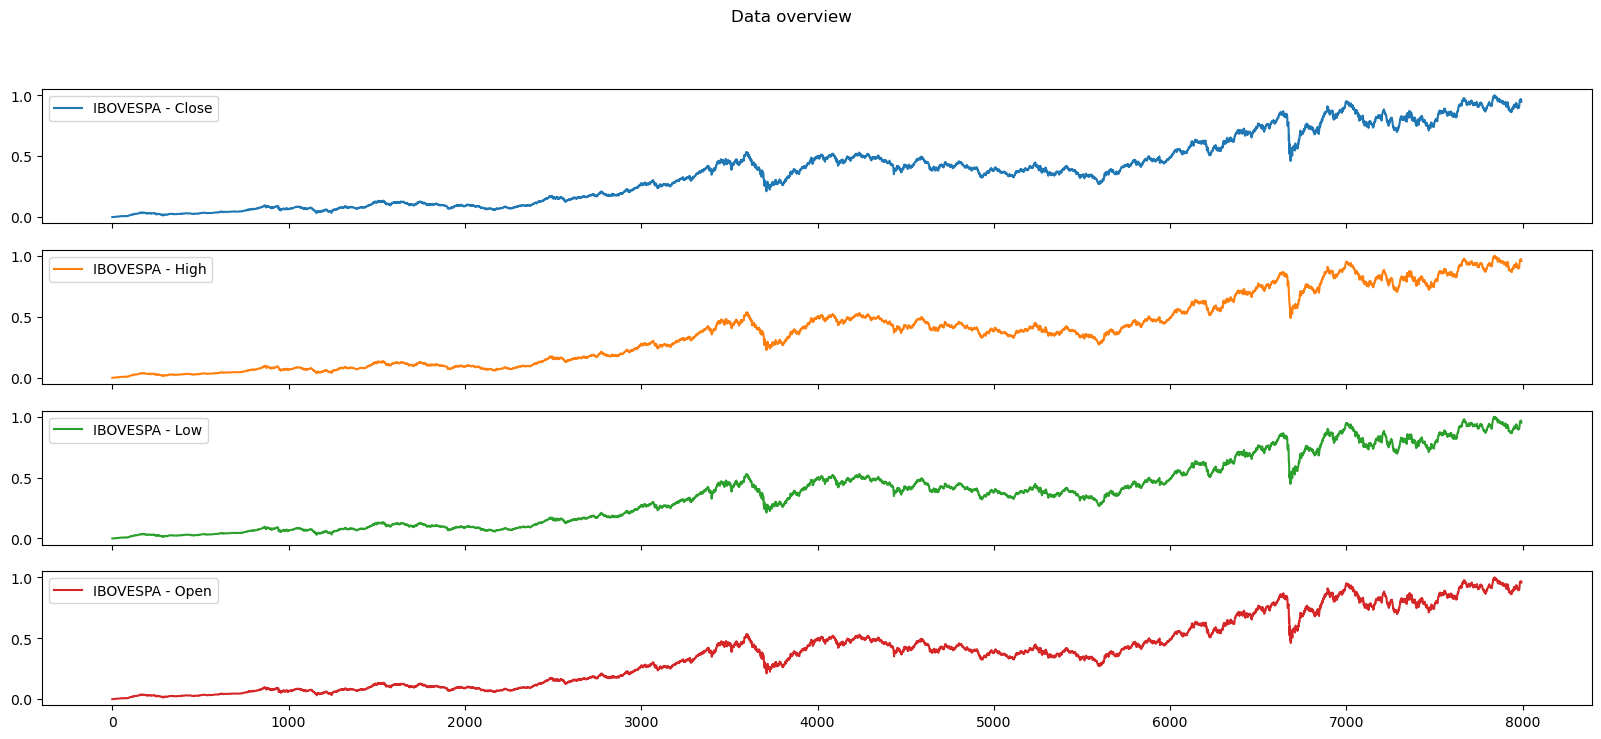

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

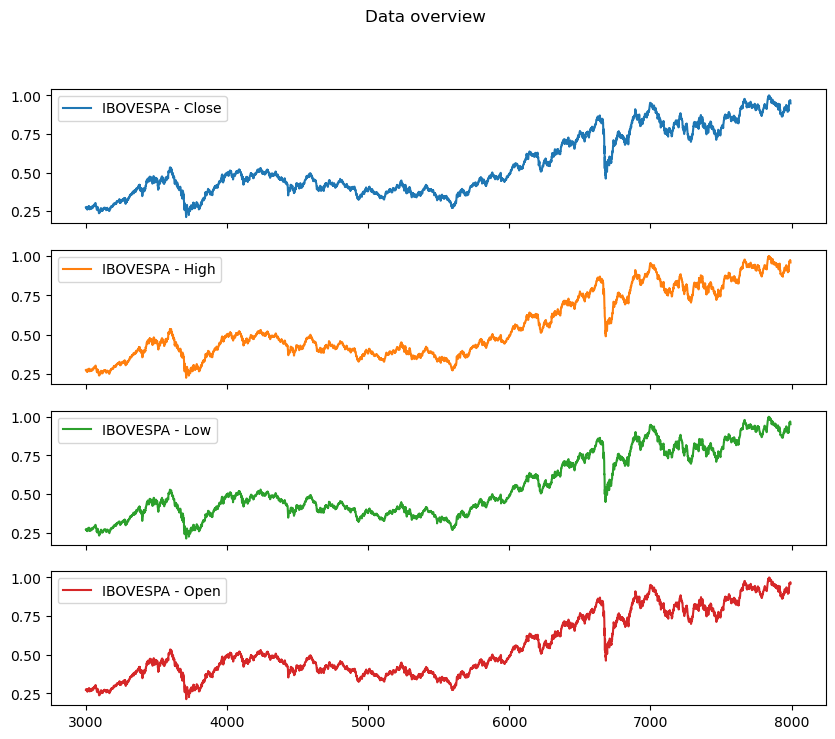

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

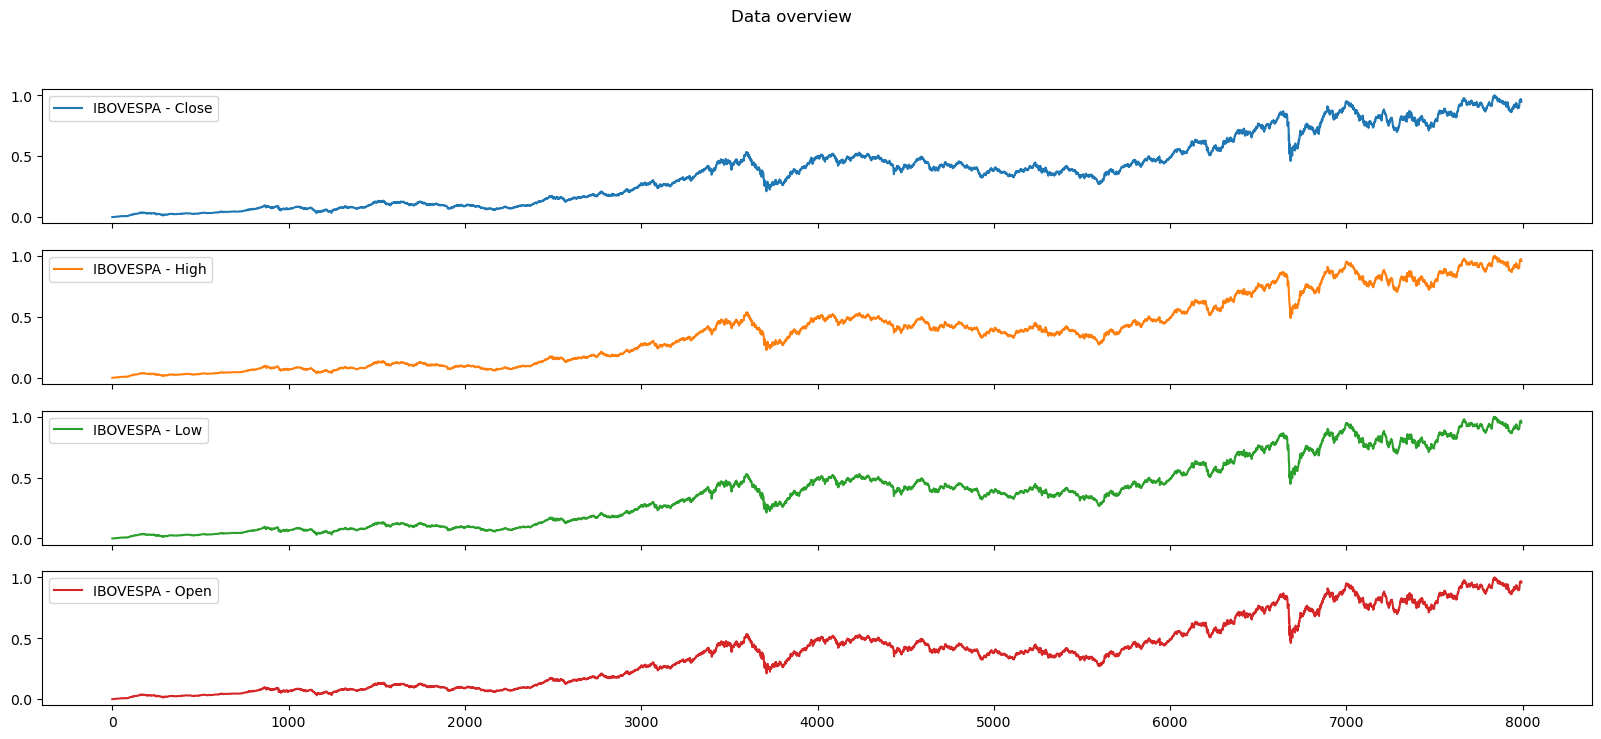

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

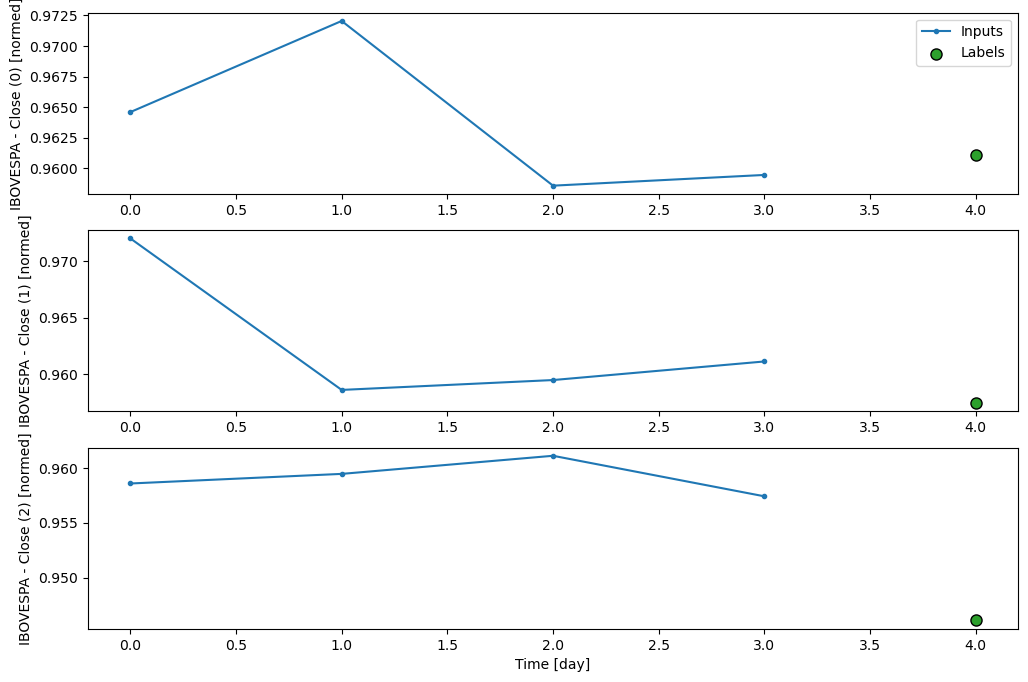

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14:17 4s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 51.6698 - mean_squared_error: 3.4059e-05 - root_mean_squared_error: 0.0056   

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.7790 - mean_squared_error: 3.9764e-05 - root_mean_squared_error: 0.0062

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 35.2253 - mean_squared_error: 4.7801e-05 - root_mean_squared_error: 0.0067

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 32.4630 - mean_squared_error: 7.7381e-05 - root_mean_squared_error: 0.0082

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 30.6029 - mean_squared_error: 9.9485e-05 - root_mean_squared_error: 0.0093

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 29.0498 - mean_squared_error: 1.2594e-04 - root_mean_squared_error: 0.0104

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 27.8656 - mean_squared_error: 1.4344e-04 - root_mean_squared_error: 0.0112

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 26.7973 - mean_squared_error: 1.5799e-04 - root_mean_squared_error: 0.0118

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 26.1272 - mean_squared_error: 1.8450e-04 - root_mean_squared_error: 0.0127

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 25.4193 - mean_squared_error: 2.1252e-04 - root_mean_squared_error: 0.0136

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 24.8768 - mean_squared_error: 2.5177e-04 - root_mean_squared_error: 0.0147

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 24.3415 - mean_squared_error: 2.8798e-04 - root_mean_squared_error: 0.0156

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 23.8890 - mean_squared_error: 3.4959e-04 - root_mean_squared_error: 0.0169

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 23.5953 - mean_squared_error: 5.4903e-04 - root_mean_squared_error: 0.0196

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 23.3924 - mean_squared_error: 8.2803e-04 - root_mean_squared_error: 0.0229

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 23.1944 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0257    

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 22.9913 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0283

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 22.7904 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0305

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 22.5874 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0324

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 22.3939 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0341

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 22.2181 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0358

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 22.0427 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0373

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 21.8442 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0389

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 21.6794 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0404

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 21.4961 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0420

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 21.3650 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0431 - val_loss: 0.1654 - val_mean_absolute_error: 0.1654 - val_mean_absolute_percentage_error: 17.7383 - val_mean_squared_error: 0.0288 - val_root_mean_squared_error: 0.1698 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7341 - mean_absolute_error: 0.7341 - mean_absolute_percentage_error: 34445.8828 - mean_squared_error: 0.5389 - root_mean_squared_error: 0.7341

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6969 - mean_absolute_error: 0.6969 - mean_absolute_percentage_error: 14133.9824 - mean_squared_error: 0.4887 - root_mean_squared_error: 0.6984 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6102 - mean_absolute_error: 0.6102 - mean_absolute_percentage_error: 9810.7510 - mean_squared_error: 0.4022 - root_mean_squared_error: 0.6289 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5317 - mean_absolute_error: 0.5317 - mean_absolute_percentage_error: 7689.7642 - mean_squared_error: 0.3361 - root_mean_squared_error: 0.5691

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - mean_absolute_percentage_error: 6389.3940 - mean_squared_error: 0.2892 - root_mean_squared_error: 0.5226

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4222 - mean_absolute_error: 0.4222 - mean_absolute_percentage_error: 5501.0728 - mean_squared_error: 0.2546 - root_mean_squared_error: 0.4860

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3845 - mean_absolute_error: 0.3845 - mean_absolute_percentage_error: 4850.7583 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4563

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3540 - mean_absolute_error: 0.3540 - mean_absolute_percentage_error: 4351.5747 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4317

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 3955.0269 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.4108

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - mean_absolute_percentage_error: 3631.4397 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.3928

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 3361.6267 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3771

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 3132.8091 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3632

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 2936.0247 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3508

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2470 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 2764.8286 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3397

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 2614.5225 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3299

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 2481.2539 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3210

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 2362.1948 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3128

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 2243.8706 - mean_squared_error: 0.1131 - root_mean_squared_error: 0.3045

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 2148.0083 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.2976

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1982 - mean_absolute_error: 0.1982 - mean_absolute_percentage_error: 2060.7598 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.2912

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 1972.5431 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2845

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 1899.9843 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.2790

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1821 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 1833.0917 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2738

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1778 - mean_absolute_error: 0.1778 - mean_absolute_percentage_error: 1771.1919 - mean_squared_error: 0.0909 - root_mean_squared_error: 0.2690

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1740 - mean_absolute_error: 0.1740 - mean_absolute_percentage_error: 1713.7472 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2646

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 1660.2576 - mean_squared_error: 0.0858 - root_mean_squared_error: 0.2605

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1667 - mean_absolute_error: 0.1667 - mean_absolute_percentage_error: 1604.9678 - mean_squared_error: 0.0832 - root_mean_squared_error: 0.2561

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 1599.6691 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2557 - val_loss: 0.1159 - val_mean_absolute_error: 0.1159 - val_mean_absolute_percentage_error: 12.3825 - val_mean_squared_error: 0.0149 - val_root_mean_squared_error: 0.1221 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.4895 - mean_absolute_error: 0.4895 - mean_absolute_percentage_error: 22978.0742 - mean_squared_error: 0.2396 - root_mean_squared_error: 0.4895

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4552 - mean_absolute_error: 0.4552 - mean_absolute_percentage_error: 9376.3398 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4572  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 6462.3052 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.4050

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 5061.1328 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3664

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 4205.4800 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3368

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2761 - mean_absolute_error: 0.2761 - mean_absolute_percentage_error: 3621.3066 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.3135

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 3194.1511 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2946

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 2866.3684 - mean_squared_error: 0.0866 - root_mean_squared_error: 0.2790

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 2606.3203 - mean_squared_error: 0.0796 - root_mean_squared_error: 0.2658

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 2373.0593 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2533

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 2199.5759 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2435

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 2082.9419 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2367

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1780 - mean_absolute_error: 0.1780 - mean_absolute_percentage_error: 1951.7389 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2287

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - mean_absolute_percentage_error: 1837.6385 - mean_squared_error: 0.0579 - root_mean_squared_error: 0.2216

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 1737.3875 - mean_squared_error: 0.0550 - root_mean_squared_error: 0.2151

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 1648.5223 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2092

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 1569.1530 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2038

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 1497.7915 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.1988

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 1433.2429 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1941

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 1374.5516 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.1898

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 1320.9387 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1858

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 1271.7742 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1822

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 1226.4928 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1787

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 1180.1719 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1752

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 1137.5665 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1720

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 1102.0212 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1694

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 1068.8386 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1668

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 1058.2690 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1660 - val_loss: 0.0951 - val_mean_absolute_error: 0.0951 - val_mean_absolute_percentage_error: 10.1411 - val_mean_squared_error: 0.0103 - val_root_mean_squared_error: 0.1016 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.4409 - mean_absolute_error: 0.4409 - mean_absolute_percentage_error: 20696.1191 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4409

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4102 - mean_absolute_error: 0.4102 - mean_absolute_percentage_error: 8044.2266 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.4115  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3480 - mean_absolute_error: 0.3480 - mean_absolute_percentage_error: 5515.4814 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3642

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 4380.6289 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.3294

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2641 - mean_absolute_error: 0.2641 - mean_absolute_percentage_error: 3667.6213 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.3027

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 3174.0178 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2818

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 2808.9365 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2649

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 2498.9314 - mean_squared_error: 0.0699 - root_mean_squared_error: 0.2494

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 2278.3528 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2376

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 2078.9092 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2263

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 1929.7791 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2175

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 1789.6079 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2089

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 1670.2841 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.2014

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 1576.9945 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.1953

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 1485.9712 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1892

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 1413.4211 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1842

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1209 - mean_absolute_error: 0.1209 - mean_absolute_percentage_error: 1341.4458 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1791

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 1283.2313 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1749

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 1230.3232 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1710

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 1182.0092 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1674

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1137.7086 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1640

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 1096.9119 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1608

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1059.2080 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1579

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 1028.0143 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1554

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 998.7839 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1532 

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 968.0097 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1508

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 945.4830 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1490 - val_loss: 0.0404 - val_mean_absolute_error: 0.0404 - val_mean_absolute_percentage_error: 4.2956 - val_mean_squared_error: 0.0021 - val_root_mean_squared_error: 0.0458 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.4052 - mean_absolute_error: 0.4052 - mean_absolute_percentage_error: 19031.4316 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.4052

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3772 - mean_absolute_error: 0.3772 - mean_absolute_percentage_error: 7764.6040 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3782  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3309 - mean_absolute_error: 0.3309 - mean_absolute_percentage_error: 5387.8472 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3402

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 4226.2212 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.3085

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 3514.7485 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2838

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 2984.0103 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2623

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 2638.5383 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2468

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 2371.7139 - mean_squared_error: 0.0606 - root_mean_squared_error: 0.2337

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 2158.7646 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2226

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 1966.8962 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2121

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 1823.8409 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.2038

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1487 - mean_absolute_error: 0.1487 - mean_absolute_percentage_error: 1689.6672 - mean_squared_error: 0.0446 - root_mean_squared_error: 0.1957

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 1586.3052 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1892

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 1496.0682 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1834

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 1416.5497 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1782

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 1345.8650 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1735

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 1282.5648 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1692

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 1225.5055 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1652

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 1173.7809 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1615

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 1126.6525 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1580

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1083.5200 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1548

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 1043.8789 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1518

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 1007.3029 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1489

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 973.4392 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1463 

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 945.3796 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1441

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 915.8701 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1418

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 885.3712 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1393

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 882.4482 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1391 - val_loss: 0.0457 - val_mean_absolute_error: 0.0457 - val_mean_absolute_percentage_error: 4.8546 - val_mean_squared_error: 0.0025 - val_root_mean_squared_error: 0.0502 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 10825.8145 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2304

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 4348.4741 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.2028  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 2965.4583 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1754

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 2312.6614 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1576

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1284 - mean_absolute_error: 0.1284 - mean_absolute_percentage_error: 1916.8152 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1444

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 1648.3126 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1341

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 1452.4058 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1259

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 1302.3147 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1191

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 1207.5468 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1145

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 1106.3136 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1095

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 1022.4390 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1051

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 951.6008 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1013 

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 890.8803 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0978

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 838.1756 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0948

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 791.9708 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0921

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 746.8538 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0895

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 710.8494 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0873

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 678.4905 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0854

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 649.2361 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0835

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 619.8453 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0817

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 595.8082 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0802

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 573.7510 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0788

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 553.4245 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0774

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 534.6287 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0762

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 517.1987 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0751

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 500.9882 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0742

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 485.8611 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0734

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 479.4598 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0730 - val_loss: 0.0400 - val_mean_absolute_error: 0.0400 - val_mean_absolute_percentage_error: 4.2466 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0451 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 13665.9697 - mean_squared_error: 0.0846 - root_mean_squared_error: 0.2909

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 5554.2661 - mean_squared_error: 0.0719 - root_mean_squared_error: 0.2677  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 3837.7454 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2383

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 3006.1519 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.2156

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 2497.9092 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1982

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 2118.4033 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1830

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1465 - mean_absolute_error: 0.1465 - mean_absolute_percentage_error: 1871.8865 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1720

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 1681.7815 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1629

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 1530.3480 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1551

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 1394.1882 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1478

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1292.7687 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1420

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 1206.4611 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1369

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 1132.0231 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1323

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 1067.1083 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1283

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 1009.9687 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1246

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 959.2354 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1214 

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 913.8410 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1184

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 868.6580 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1153

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 832.0088 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1128

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 795.0875 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1102

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 768.0531 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1082

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 742.9707 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1064

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 716.8236 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1044

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 692.6239 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1026

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 670.1603 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1009

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 649.2489 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0993

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 627.6388 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0976

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 625.5678 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0975 - val_loss: 0.0472 - val_mean_absolute_error: 0.0472 - val_mean_absolute_percentage_error: 5.0315 - val_mean_squared_error: 0.0026 - val_root_mean_squared_error: 0.0510 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 9831.3164 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.2090

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 3953.2942 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1847 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1511 - mean_absolute_error: 0.1511 - mean_absolute_percentage_error: 2697.8132 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1597

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 2097.7588 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1424

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 1734.7712 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1297

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 1489.3376 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1200

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 1310.8551 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1124

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 1161.2068 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1056

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 1055.7926 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1004

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 969.8022 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0961 

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 898.1138 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0923

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 831.0811 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0886

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 779.5656 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0856

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 734.6651 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0830

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 695.1691 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0807

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 660.1146 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0787

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 628.7621 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0768

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 597.5702 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0749

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 572.2808 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0733

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 549.2495 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0719

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 525.9523 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0704

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 506.7728 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0691

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 489.0727 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0679

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 470.9370 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0667

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 455.8400 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0657

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 441.7795 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0649

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 430.0668 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0642 - val_loss: 0.0197 - val_mean_absolute_error: 0.0197 - val_mean_absolute_percentage_error: 2.1876 - val_mean_squared_error: 6.3372e-04 - val_root_mean_squared_error: 0.0252 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 11399.6348 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2425

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 4630.9873 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2226  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 3197.0342 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1977

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 2503.0679 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1788

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1500 - mean_absolute_error: 0.1500 - mean_absolute_percentage_error: 2080.9912 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1645

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 1849.8280 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1558

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 1626.2894 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1466

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 1456.1407 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1390

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 1321.7059 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1325

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1212.3651 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1269

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 1121.5146 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1220

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 1044.6422 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1177

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 978.6360 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1138 

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 921.2753 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1103

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 870.9252 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1072

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 826.3374 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1043

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 786.5397 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1018

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 750.7688 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0994

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 718.4210 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0972

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 689.0099 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0951

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 662.1401 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0932

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 634.8716 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0912

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 612.3613 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0895

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 591.5421 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0879

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 572.2285 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0864

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 554.2623 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0850

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 537.4996 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0838

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 528.6649 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0831 - val_loss: 0.0368 - val_mean_absolute_error: 0.0368 - val_mean_absolute_percentage_error: 3.9118 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0405 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 10260.0869 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.2181

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 4143.5815 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1961  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 2761.8809 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1706

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 2178.5366 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1543

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 1818.7853 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1421

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 1572.1991 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1327

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 1373.4518 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1243

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1237.2251 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1180

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 1117.3987 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1121

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 1029.7285 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1076

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 948.6838 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1031 

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 886.9720 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0996

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 833.5677 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0965

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 786.8535 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0936

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 745.6232 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0911

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 705.0837 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0886

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 672.5485 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0865

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 646.2915 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0847

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 622.2046 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0831

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 597.3715 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0814

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 577.0686 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0799

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 560.5164 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0788

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 542.8373 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0775

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 526.3445 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0763

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 514.6821 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0754

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 498.2216 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0742

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 482.8854 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0731

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 468.5589 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0720 - val_loss: 0.0230 - val_mean_absolute_error: 0.0230 - val_mean_absolute_percentage_error: 2.4399 - val_mean_squared_error: 7.3498e-04 - val_root_mean_squared_error: 0.0271 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 9468.2520 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.2013

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 3829.6384 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1820 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 2636.8931 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1606

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - mean_absolute_percentage_error: 2062.1587 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1449

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 1713.3152 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1333

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 1476.5222 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1242

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 1303.3588 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1170

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 1170.4100 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1110

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 1064.7296 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1058

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 978.4005 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1014 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 906.3973 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0975

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 845.2755 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0941

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 792.6635 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0910

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 746.8421 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0882

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 706.5363 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0857

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 670.7725 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0834

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 638.8014 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0813

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 610.0291 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0794

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 583.9836 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0776

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 560.2853 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0759

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 538.6245 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0744

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 518.7496 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0730

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 500.4305 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0717

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 483.4837 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0704

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 467.7597 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0693

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 464.4181 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0691

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 457.8910 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0686

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 453.1276 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0682

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 442.4279 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0675

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 433.6936 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0668 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2103 - val_mean_squared_error: 2.0973e-04 - val_root_mean_squared_error: 0.0145 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 10848.3076 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2308

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 5317.4814 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2195  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 3665.1941 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.2037

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 2799.5999 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1854

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1630 - mean_absolute_error: 0.1630 - mean_absolute_percentage_error: 2350.1140 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1727

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 2038.5048 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1624

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 1867.9209 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1561

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 1726.7891 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1505

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 1565.2146 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1436

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 1434.2688 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1376

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 1340.0776 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1330

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 1246.3689 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1283

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 1177.0465 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1246

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 1106.3507 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1207

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 1036.3040 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1167

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 975.4616 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1131 

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 922.0618 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1099

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 880.3865 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1073

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 842.6936 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1048

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 808.4202 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1026

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 777.1010 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1005

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 744.4405 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0982

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 725.5247 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0969

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 707.6423 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0956

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 690.7087 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0944

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 671.5337 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0930

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 650.5974 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0915

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 636.5043 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0904

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 617.8703 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0890

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 597.9946 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0874

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 581.7242 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0862

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 564.2834 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0848

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 549.9406 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0836

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 534.5005 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0824

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 519.9857 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0812

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 507.9818 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0802 - val_loss: 0.0300 - val_mean_absolute_error: 0.0300 - val_mean_absolute_percentage_error: 3.1973 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0329 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1591 - mean_absolute_error: 0.1591 - mean_absolute_percentage_error: 7482.0615 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1591

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 3397.8655 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1456 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 2289.2886 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1280

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 1774.1135 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1148

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 1466.2031 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1050

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 1258.2166 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0974

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 1158.8636 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0935

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 1046.0767 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0888

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 944.0430 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0843 

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 862.1002 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0805

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 802.4457 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0776

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 744.6946 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0746

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 695.5224 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0720

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 663.1409 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0703

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 638.6129 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0689

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 607.4722 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0672

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 579.5277 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 554.3334 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0642

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 531.4726 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0629

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 513.4844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0620

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 496.8039 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0611

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 476.3466 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0599

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 457.6708 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0589

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 448.9274 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0584

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 442.6099 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0580

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 438.5066 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 432.5070 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0574

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 422.9016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0568

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 410.2234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0561

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 395.1111 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 381.1781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0543

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 368.2861 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0534

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 356.3250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0527

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 345.1962 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0520

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 335.9306 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 331.5031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0512 - val_loss: 0.0452 - val_mean_absolute_error: 0.0452 - val_mean_absolute_percentage_error: 4.8309 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0478 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 2:06 534ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 8749.0732 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1859

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 3736.2551 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1688    

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 2602.0471 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1511

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 2097.8669 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1382

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - mean_absolute_percentage_error: 1814.2119 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1296

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 1605.6759 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1225

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 1445.4337 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1166

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 1298.9221 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1107

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 1182.3535 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1057

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 1087.1268 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1013

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 1018.2502 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0981

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 949.2854 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0946 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 890.0321 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0915

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 838.5010 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0888

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 787.1771 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0859

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 747.6765 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0836

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 712.3470 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0816

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 680.5484 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0797

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 655.7114 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0782

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 640.2455 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0772

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 618.5070 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0759

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 591.9423 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0742

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 570.6847 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0729

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 551.0496 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0716

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 535.3694 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0705

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 513.6141 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0690

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 493.7252 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0676

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 477.4207 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0665

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 460.4408 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0652

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 444.7405 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0641

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 430.1781 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0630

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 419.5608 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0622

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 408.1147 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0614

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 397.3396 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0606 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217 - val_mean_absolute_percentage_error: 2.2974 - val_mean_squared_error: 6.4328e-04 - val_root_mean_squared_error: 0.0254 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1510 - mean_absolute_error: 0.1510 - mean_absolute_percentage_error: 7108.1035 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1510

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 2856.2532 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1332 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 1952.1406 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1155

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 1520.0752 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1033

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 1258.6476 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0943

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 1065.1168 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0868

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 940.1478 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0815 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 834.8402 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0767

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 760.3560 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0731

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 699.4611 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0700

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 648.5176 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0674

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 605.1823 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0650

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 567.8157 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 535.2346 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0610

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 506.5494 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0594

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 481.0753 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 458.2807 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0564

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 437.7492 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 417.1893 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0538

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 400.4236 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 385.0800 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0516

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 370.9788 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0506

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 356.5866 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0496

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 344.6449 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0487

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 333.5515 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 323.2177 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0472

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 313.5683 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0465 - val_loss: 0.0356 - val_mean_absolute_error: 0.0356 - val_mean_absolute_percentage_error: 3.7935 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0388 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 8643.6074 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1837

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 3500.1040 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1669 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - mean_absolute_percentage_error: 2418.8904 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1486

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 1892.8447 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1342

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 1602.3452 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1244

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1355.8037 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1150

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 1196.8297 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1083

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 1062.8677 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1021

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 968.0643 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0974 

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 906.4290 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0942

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 838.9801 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0905

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 781.8246 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0872

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 732.6917 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0843

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 689.9539 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0817

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 652.4034 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0794

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 619.1196 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0772

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 589.3896 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0752

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 562.6542 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0734

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 538.4660 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0717

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 516.4664 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0702

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 496.3629 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0687

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 477.9135 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0673

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 460.9147 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0660

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 445.1970 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0648

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 430.6164 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0637

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 417.0497 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0626

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 404.3919 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0616

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 397.7211 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0611 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 1.4594 - val_mean_squared_error: 2.9745e-04 - val_root_mean_squared_error: 0.0172 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - mean_absolute_percentage_error: 6742.4863 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1432

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1253 - mean_absolute_error: 0.1253 - mean_absolute_percentage_error: 2709.6802 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1264 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 1852.4407 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1098

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 1409.9827 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0972

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 1174.6272 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0892

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 1014.0435 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0832

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 896.5518 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0786 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 806.1998 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0747

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 734.1419 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0715

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 675.1257 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0686

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 625.8151 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0661

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 583.8978 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0638

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 547.7770 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0618

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 516.2916 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0600

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 485.7162 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0582

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 461.4423 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0567

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 437.4362 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0553

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 418.0743 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0541

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 400.5163 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 386.2237 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0520

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 371.4371 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0510

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 360.7758 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 354.9820 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 349.3902 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 340.0581 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 328.8385 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 318.4087 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0473

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 308.6863 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 301.5689 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462 - val_loss: 0.0449 - val_mean_absolute_error: 0.0449 - val_mean_absolute_percentage_error: 4.7810 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0484 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 7533.2119 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1601

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 3041.3323 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1438 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 2092.6479 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1267

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 1635.0312 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1141

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 1357.4843 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1047

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 1151.7970 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0968

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 1018.5066 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0912

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 926.0226 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0870 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 850.6428 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0833

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 780.6873 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0798

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 722.4793 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0766

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 673.1693 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0739

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 635.2056 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0717

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 597.7944 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0694

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 564.9637 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0674

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 532.8631 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0654

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 507.2313 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0637

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 484.1846 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0622

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 463.3377 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0607

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 444.3797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0594

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 427.0579 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0581

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 411.1635 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0570

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 396.5204 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0559

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 382.9817 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0549

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 370.4234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0539

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 358.7398 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0530

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 347.8403 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0522

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 342.0968 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0517 - val_loss: 0.0159 - val_mean_absolute_error: 0.0159 - val_mean_absolute_percentage_error: 1.7032 - val_mean_squared_error: 3.9791e-04 - val_root_mean_squared_error: 0.0199 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 5867.0186 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1246

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 2349.4316 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1085 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 1601.3855 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0935

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 1278.6639 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0849

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 1096.2793 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0791

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 933.3137 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0733 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 817.2672 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0688

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 729.6234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0652

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 660.8044 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0621

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 605.1540 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0594

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 559.0981 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0572

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 520.2347 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0551

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 486.9369 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 458.0544 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 432.7550 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 410.3933 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 388.3776 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 370.6870 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 353.0100 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 338.6201 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 325.4695 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 313.4000 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 301.0967 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 290.9001 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 281.4378 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 272.6306 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 263.5314 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 260.9329 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 1.2789 - val_mean_squared_error: 2.3477e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 6824.1387 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1449

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 2748.6851 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1290 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 1887.6145 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1131

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 1475.4636 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1021

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 1225.8279 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0940

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 1056.5396 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0878

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 920.9717 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0822 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 828.4288 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0781

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 754.6082 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0746

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 694.1380 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0715

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 643.5892 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0688

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 596.2183 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0662

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 555.9903 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0639

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 524.6109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0620

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 496.9383 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0603

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 472.3310 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0588

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 452.6196 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0576

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 432.5151 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0563

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 414.2912 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 397.6870 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0540

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 380.8787 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 367.0361 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0519

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 354.2610 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0510

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 342.4307 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0501

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 330.2669 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0492

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 320.1060 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 310.6136 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2950 - val_mean_squared_error: 2.4118e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 5870.0493 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1247

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 2357.0005 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1097 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 1610.2815 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0950

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 1253.9093 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0850

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 1038.8196 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0777

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 893.3512 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0722 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 787.5283 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0679

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 706.5017 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0644

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 642.2404 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0614

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 589.8237 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 546.1581 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0566

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 505.3521 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 473.9998 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 446.6863 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 422.6616 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 401.3457 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 382.2847 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 365.1264 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 347.9514 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 333.9495 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 321.1378 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 309.3658 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 298.5079 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 288.4587 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 278.1326 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 269.5120 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 260.6013 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392 - val_loss: 0.0192 - val_mean_absolute_error: 0.0192 - val_mean_absolute_percentage_error: 2.0388 - val_mean_squared_error: 5.2894e-04 - val_root_mean_squared_error: 0.0230 - lr: 0.0059


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:38s:96ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 20:28:31.217254: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:27:43',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:38s:96ms',
 'TRAINING_EPOCHS': 21,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:28:31.441515: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 6704.4424 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1424

 15/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 2213.1812 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1322 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 1509.7363 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1275

 41/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 1255.6078 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1241

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 1113.9930 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1217

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 1016.3889 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1196

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 911.7161 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1170 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 865.2515 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1158

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 817.7486 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1144

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 764.9288 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1127

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 705.5506 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1103

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 659.5638 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1081

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 626.6788 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1064

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 591.1750 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1043

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 562.6015 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1025

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 534.5524 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1006

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 509.4820 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0987

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 492.8503 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0974

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 471.8852 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0958

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 447.9259 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0937

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 432.4132 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0924

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 412.6105 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0906

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 398.4171 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0892

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 392.3239 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0886


Loss: 0.04528849571943283 - MAE: 0.04528849571943283 - MSE: 0.0036958730779588223 - MAPE: 106.76714324951172 - RMSE: 0.060793694108724594


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 1.2244 - mean_squared_error: 1.6511e-04 - root_mean_squared_error: 0.0128

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 1.8476 - mean_squared_error: 4.1843e-04 - root_mean_squared_error: 0.0203 


Loss: 0.019220655784010887 - MAE: 0.019220655784010887 - MSE: 0.000528936623595655 - MAPE: 2.0388076305389404 - RMSE: 0.022998621687293053


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 2.3685 - mean_squared_error: 5.4489e-04 - root_mean_squared_error: 0.0233

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 1.8256 - mean_squared_error: 3.9412e-04 - root_mean_squared_error: 0.0198


Loss: 0.015678388997912407 - MAE: 0.015678388997912407 - MSE: 0.0003657956840470433 - MAPE: 1.6767051219940186 - RMSE: 0.019125785678625107


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

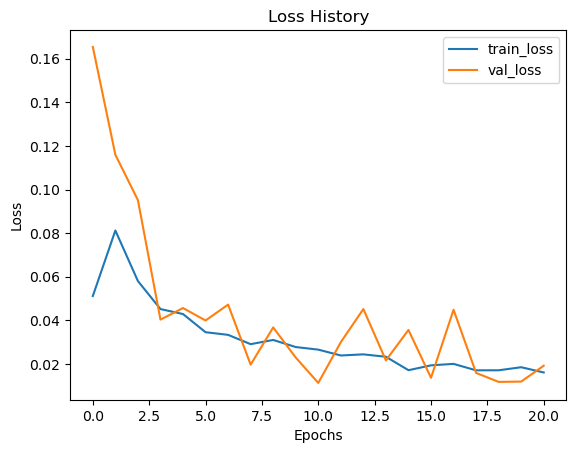

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

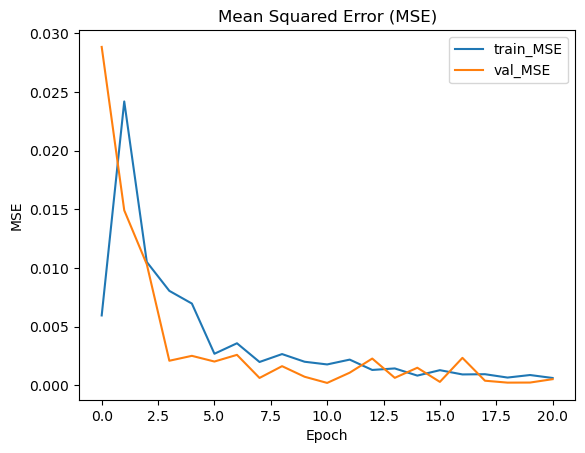

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

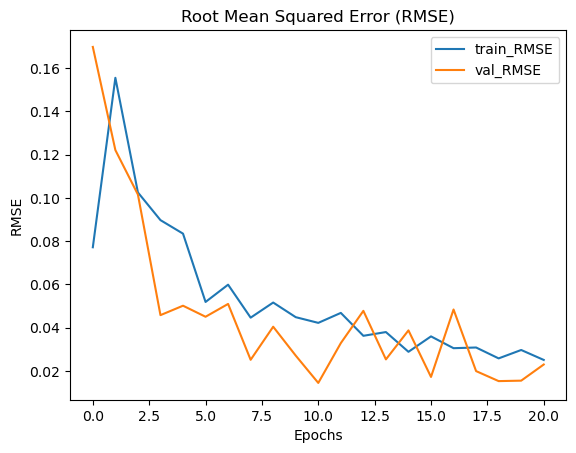

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

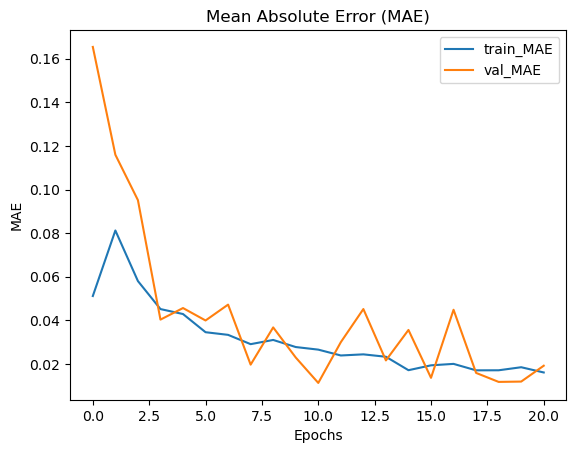

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

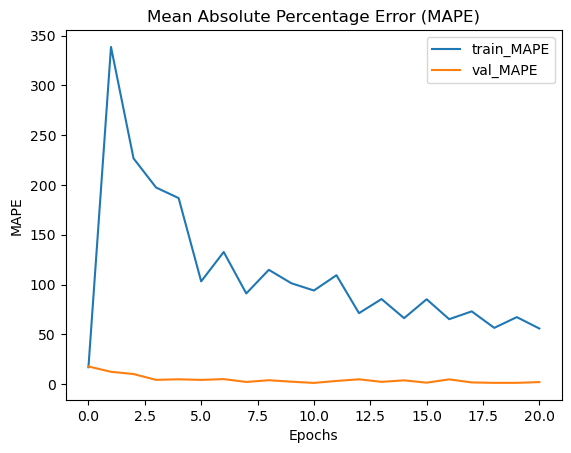

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:28:35.763928: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 4)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


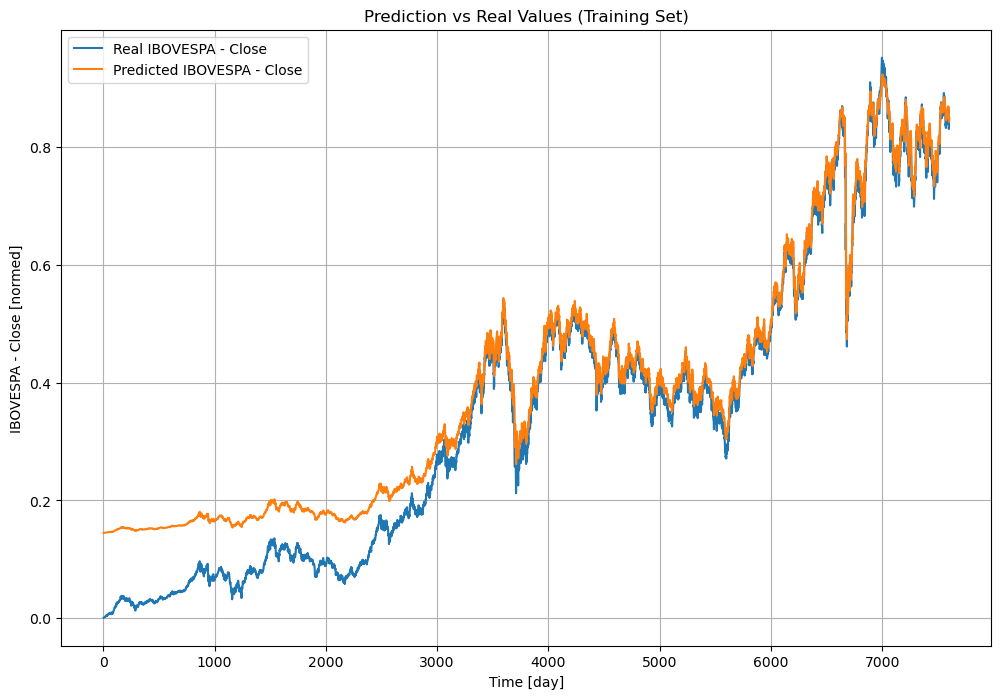

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 4)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


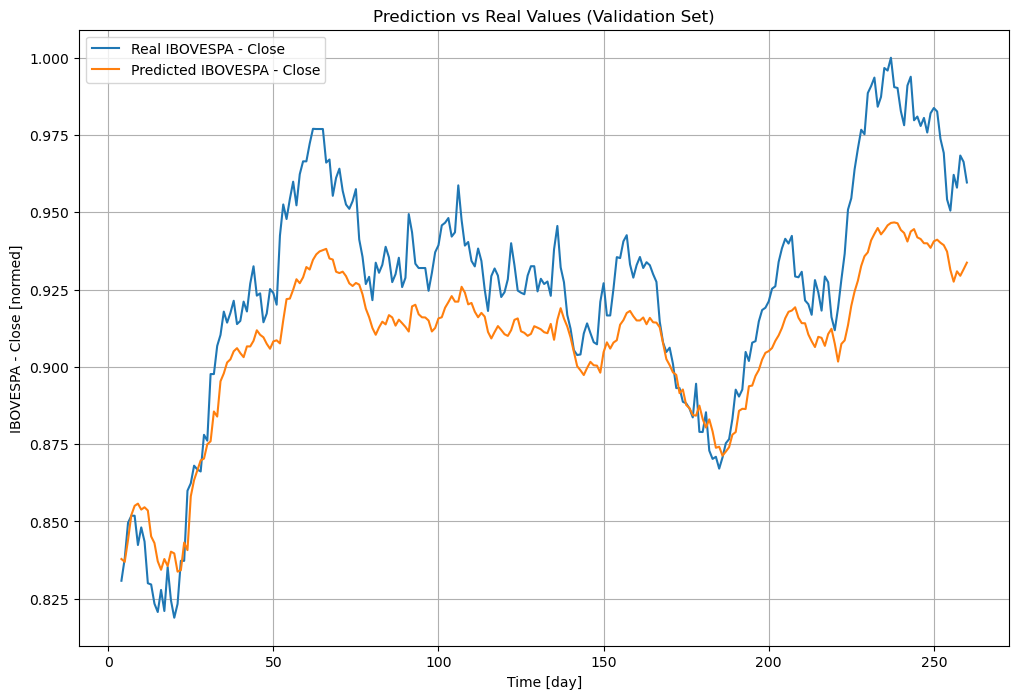

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 4)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


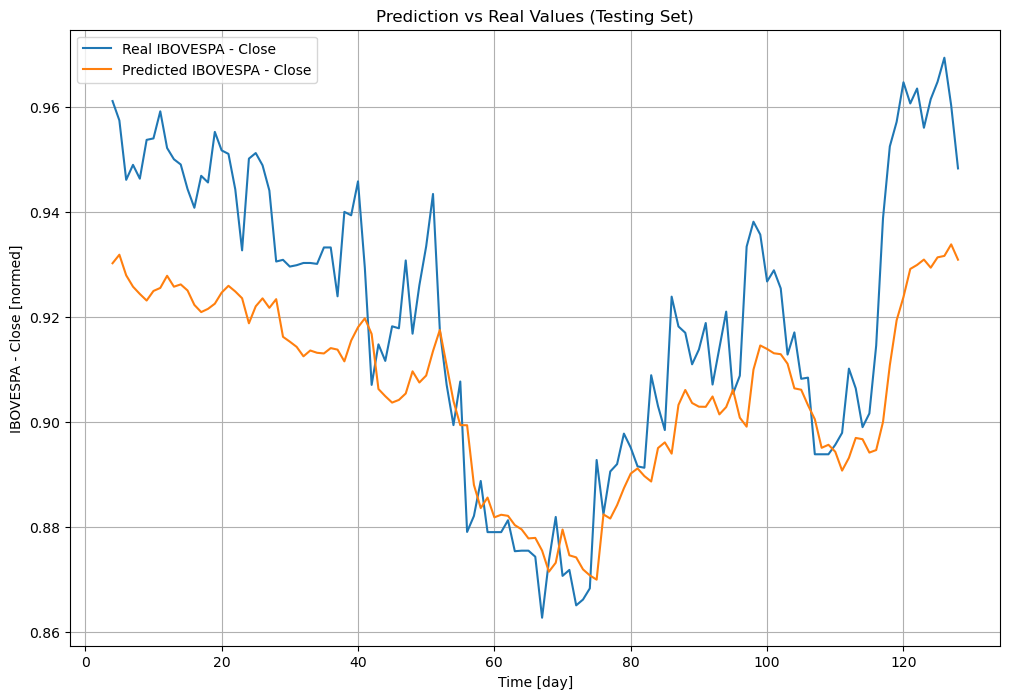

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

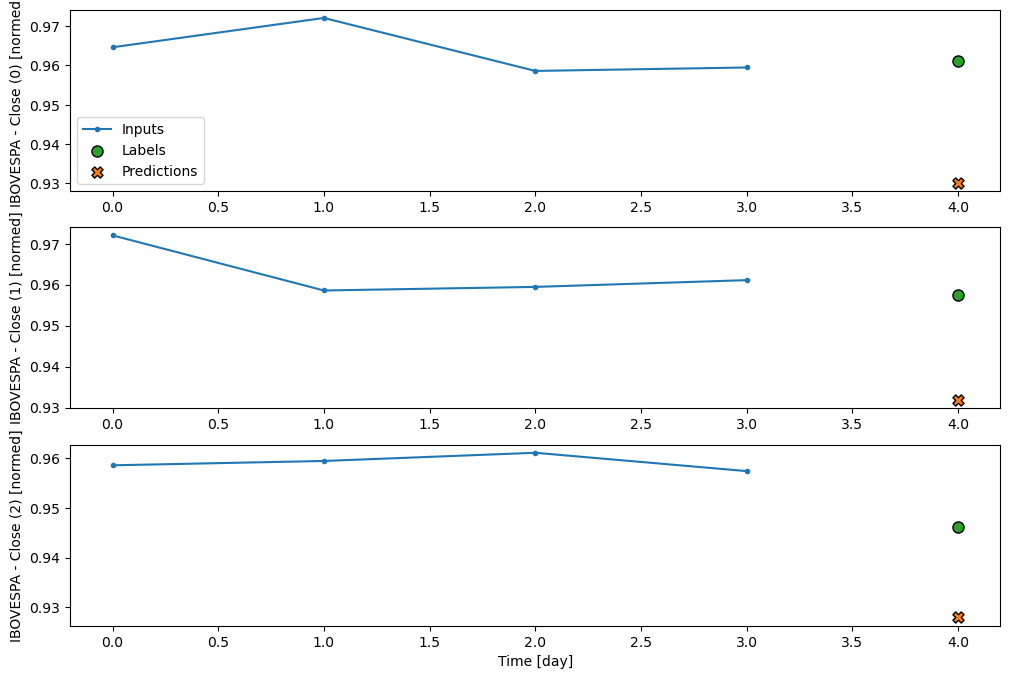

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:49s:787ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step


array([[[0.9302069 , 0.9302069 , 0.9302069 , ..., 0.9302069 ,
         0.9302069 , 0.9302069 ]],

       [[0.9318334 , 0.9318334 , 0.9318334 , ..., 0.9318334 ,
         0.9318334 , 0.9318334 ]],

       [[0.9279064 , 0.9279064 , 0.9279064 , ..., 0.9279064 ,
         0.9279064 , 0.9279064 ]],

       ...,

       [[0.93160343, 0.93160343, 0.93160343, ..., 0.93160343,
         0.93160343, 0.93160343]],

       [[0.93380725, 0.93380725, 0.93380725, ..., 0.93380725,
         0.93380725, 0.93380725]],

       [[0.93088734, 0.93088734, 0.93088734, ..., 0.93088734,
         0.93088734, 0.93088734]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')